Original block: 0100001001001101
Encrypted block: 0111110100011101


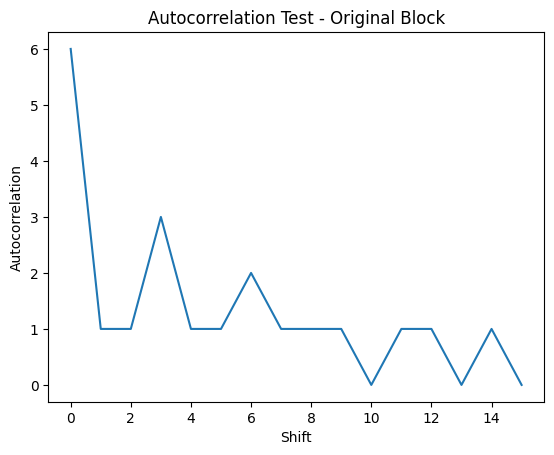

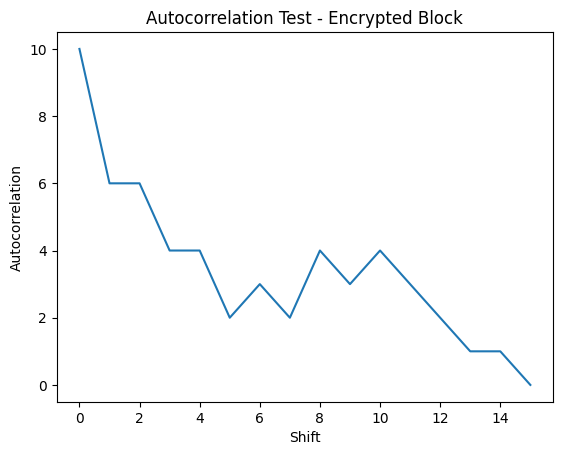

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from bitstring import BitArray

# Замените пути на свои
ORIGINAL_FILE_PATH = 'C:\\Users\\dryag\\Documents\\cryptography\\cast_128\\input.bmp'
ENCRYPTED_FILE_PATH = 'C:\\Users\\dryag\\Documents\\cryptography\\cast_128\\img_e_expirement1.bmp'

def read_bytes(file_path):
    with open(file_path, 'rb') as file:
        return file.read()

def autocorrelation_test(data):
    # Преобразование строки битов в массив чисел
    data_array = np.array(list(map(int, data)))
    autocorrelation = np.correlate(data_array, data_array, mode='full')
    return autocorrelation[len(autocorrelation)//2:]

def plot_autocorrelation(data, title):
    autocorrelation = autocorrelation_test(data)
    plt.plot(autocorrelation)
    plt.title(title)
    plt.xlabel('Shift')
    plt.ylabel('Autocorrelation')
    plt.show()

def main():
    original_data = read_bytes(ORIGINAL_FILE_PATH)
    encrypted_data = read_bytes(ENCRYPTED_FILE_PATH)

    # Преобразование байтов в битовые последовательности
    original_bits = BitArray(bytes=original_data).bin
    encrypted_bits = BitArray(bytes=encrypted_data).bin

    # Анализ изменения битов на позициях блока (пример)
    # Вам может потребоваться изменить эту часть в зависимости от вашего конкретного теста

    # Выберите блок битов для анализа (пример: первые 1000 бит)
    block_size = 256
    original_block = original_bits[:block_size]
    encrypted_block = encrypted_bits[:block_size]

    # Вывод результатов анализа
    print("Original block:", original_block)
    print("Encrypted block:", encrypted_block)

    # Построение графика автокорреляционного теста
    plot_autocorrelation(original_block, "Autocorrelation Test - Original Block")
    plot_autocorrelation(encrypted_block, "Autocorrelation Test - Encrypted Block")

if __name__ == "__main__":
    main()
